In [10]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 通过ucimlrepo加载蘑菇数据集
mushroom = fetch_ucirepo(id=73)
df = pd.concat([mushroom.data.features, mushroom.data.targets], axis=1)

# 缺失值处理（蘑菇数据集的stalk-root有缺失）
if df['stalk-root'].isnull().any():
    df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)

# 编码
df_encoded = df.copy()
for col in df_encoded.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('poisonous', axis=1)
y = df_encoded['poisonous']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

C:\Users\Hastu\AppData\Local\Temp\ipykernel_24168\2318537810.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("决策树模型准确率：%.4f" % acc_tree)

决策树模型准确率：1.0000


In [12]:
print("\n决策树模型详细分类报告：")
print(classification_report(y_test, y_pred_tree))
print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred_tree))


决策树模型详细分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

混淆矩阵：
[[1263    0]
 [   0 1175]]


In [13]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=500, solver='lbfgs')
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("逻辑回归模型准确率：%.4f" % acc_lr)

逻辑回归模型准确率：0.9614


In [14]:
print("\n逻辑回归模型详细分类报告：")
print(classification_report(y_test, y_pred_lr))
print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred_lr))


逻辑回归模型详细分类报告：
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1263
           1       0.96      0.96      0.96      1175

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

混淆矩阵：
[[1217   46]
 [  48 1127]]


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("随机森林模型准确率：%.4f" % acc_rf)

随机森林模型准确率：1.0000


In [16]:
print("\n随机森林模型详细分类报告：")
print(classification_report(y_test, y_pred_rf))
print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred_rf))


随机森林模型详细分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

混淆矩阵：
[[1263    0]
 [   0 1175]]


In [17]:
from sklearn.naive_bayes import GaussianNB

# 对所有特征列做编码
def encode_features(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df

class bayes_model():
    def __init__(self):
        pass

    # ? 加载数据
    def load_data(self):
        # fetch dataset
        # data (as pandas dataframes)
        X = mushroom.data.features.copy()
        y = mushroom.data.targets.copy()
        X = encode_features(X)
        y = y.values.ravel()  # 保证y为一维
        train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=123)
        return train_x, test_x, train_y, test_y

    # ? 训练高斯朴素贝叶斯模型
    def train_model(self, train_x, train_y):
        clf = GaussianNB()
        clf.fit(train_x, train_y)
        return clf

    # ? 处理预测的数据
    def proba_data(self, clf, test_x, test_y):
        y_predict = clf.predict(test_x)  # 返回待预测样本的预测结果(所属类别)
        y_proba = clf.predict_proba(test_x)  # 返回预测样本属于各标签的概率
        accuracy = accuracy_score(test_y, y_predict) * 100  # 计算predict预测的准确率

        return y_predict, y_proba, accuracy

    # ? 训练数据
    def exc_p(self):
        train_x, test_x, train_y, test_y = self.load_data()  # 加载数据
        clf = self.train_model(train_x, train_y)  # 训练 高斯朴素贝叶斯 模型clf
        y_predict, y_proba, accuracy = self.proba_data(clf, test_x, test_y)  # 利用训练好的模型clf对测试集test_x进行结果预测分析

        return train_x, test_x, train_y, test_y, y_predict, y_proba, accuracy

In [21]:
train_x, test_x, train_y, test_y, y_predict_bayes, y_proba, accuracy = bayes_model().exc_p()
featurenames = list(mushroom.data.features.columns)
tot1 = pd.DataFrame([test_y, y_predict_bayes]).T
tot2 = pd.DataFrame(y_proba).apply(lambda col: col.map(lambda x: '%.2f' % x))
tot = pd.merge(tot1, tot2, left_index=True, right_index=True)
proba_cols = [f'predict_{i}' for i in range(tot2.shape[1])]
tot.columns = ['y_true', 'y_predict'] + proba_cols
print("=============================================朴素贝叶斯repo==============================================")
print(classification_report(test_y, y_predict_bayes))
print("混淆矩阵：")
print(confusion_matrix(test_y, y_predict_bayes))
print("=============================================准确率==============================================")
print(f'The accuracy of Testset is: {accuracy:.2f}%')

=============================================朴素贝叶斯repo==============================================
              precision    recall  f1-score   support

           e       0.91      0.93      0.92      1271
           p       0.92      0.90      0.91      1167

    accuracy                           0.92      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.92      0.92      2438

混淆矩阵：
[[1178   93]
 [ 114 1053]]
=============================================准确率==============================================
The accuracy of Testset is: 91.51%


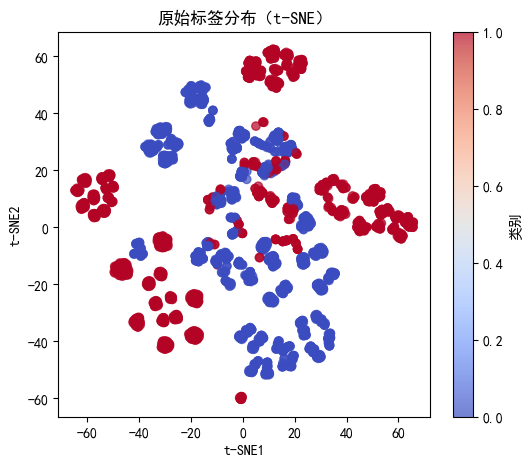

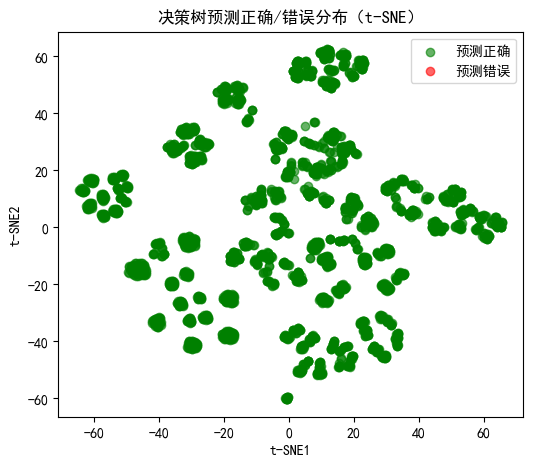

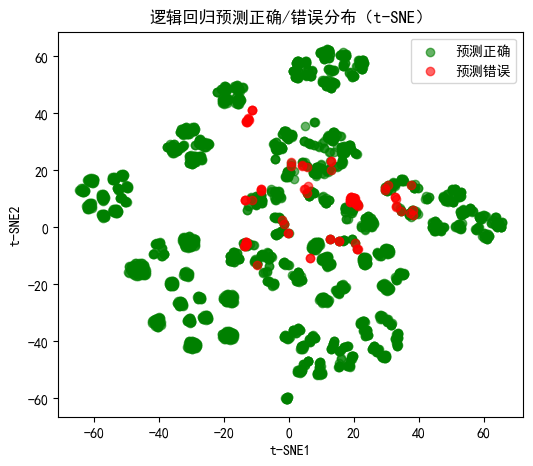

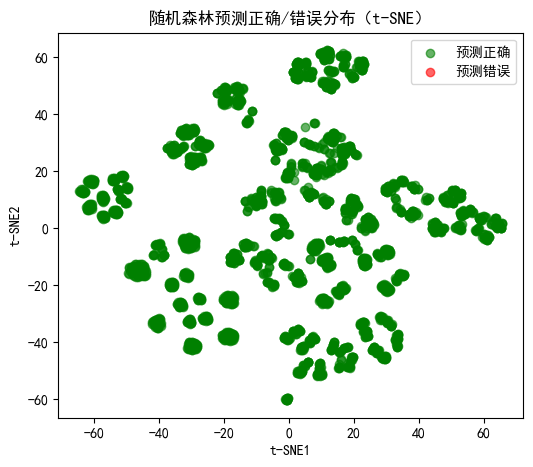

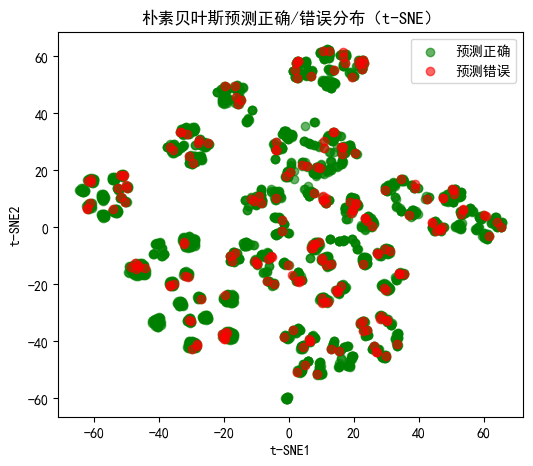

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# t-SNE降维（只做一次）
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_test)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 1. 原始标签分布
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
plt.title('原始标签分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.colorbar(label='类别')
plt.show()

# 2. 决策树预测正确/错误分布
correct = (y_test == y_pred_tree)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[correct, 0], X_tsne[correct, 1], c='g', label='预测正确', alpha=0.6)
plt.scatter(X_tsne[~correct, 0], X_tsne[~correct, 1], c='r', label='预测错误', alpha=0.6)
plt.title('决策树预测正确/错误分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

# 3. 逻辑回归预测正确/错误分布
correct = (y_test == y_pred_lr)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[correct, 0], X_tsne[correct, 1], c='g', label='预测正确', alpha=0.6)
plt.scatter(X_tsne[~correct, 0], X_tsne[~correct, 1], c='r', label='预测错误', alpha=0.6)
plt.title('逻辑回归预测正确/错误分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

# 4. 随机森林预测正确/错误分布
correct = (y_test == y_pred_rf)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[correct, 0], X_tsne[correct, 1], c='g', label='预测正确', alpha=0.6)
plt.scatter(X_tsne[~correct, 0], X_tsne[~correct, 1], c='r', label='预测错误', alpha=0.6)
plt.title('随机森林预测正确/错误分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

# 5. 朴素贝叶斯预测正确/错误分布
correct = (test_y == y_predict_bayes)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[correct, 0], X_tsne[correct, 1], c='g', label='预测正确', alpha=0.6)
plt.scatter(X_tsne[~correct, 0], X_tsne[~correct, 1], c='r', label='预测错误', alpha=0.6)
plt.title('朴素贝叶斯预测正确/错误分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()